<a href="https://colab.research.google.com/github/rant95/Wine-quality-prediction/blob/main/telco_customer_churn_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* [1. Executive Summary](#1)
* [2. Data Introduction](#2)
* [3. Loading and Exploring Data¶](#3)
* [4. The response variable : Churn](#4)
* [5. Missing data, label encoding, and factorizing variables](#5)
  * [5.1 Dealing with missing data](#5.1)
  * [5.2 Label encoding/factorizing the character variables](#5.2)
    * [5.2.1 gender](#5.2.1)
    * [5.2.2 Partner](#5.2.2)
    * [5.2.3 Dependents](#5.2.3)
    * [5.2.4 PhoneService](#5.2.4)
    * [5.2.5 MultipleLines](#5.2.5)
    * [5.2.6 Internet variables](#5.2.6)
    * [5.2.7 Contract](#5.2.7)
    * [5.2.8 PaperlessBilling](#5.2.8)
    * [5.2.9 PaymentMethod](#5.2.9)
    * [5.2.10 SeniorCitizen](#5.2.10)
  * [5.3 Analyzing the continuous variables and discover correlations](#5.3)
    * [5.3.1 tenure](#5.3.1)
    * [5.3.2 MonthlyCharges](#5.3.2)
    * [5.3.3 TotalCharges](#5.3.3)
  * [5.4 Checking outliers in continous variables](#5.4)
* [6. Feature engineering](#6)
  * [6.1 tenure_bin](#6.1)
* [7. Preparing data for modeling](#7)
  * [7.1 Dropping highly correlated variables](#7.1)
  * [7.2 PreProcessing predictor variables](#7.2)
  * [7.3 Normalizing and Standardizing the data](#7.3)
  * [7.4 One hot encoding the categorical variables](#7.4)
  * [7.5 Splitting train and test sets](#7.5)
* [8. Modeling](#8)
  * [8.1 Random Forest](#8.1)
  * [8.2 XGBoost](#8.2)
  * [8.3 Logistic Regression](#8.3)
  * [8.4 SVM](#8.4)
  * [8.5 Summary of all the models](#8.5)

## 1. Executive Summary<a id="1"></a>

The primary purpose is to practice and enhance my skills in data analysis.

This analysis focuses on the behavior of telecom customers who are more likely to leave the platform. I intend to find out the most striking behavior of customers through EDA and later on use some of the predictive analytics techniques to determine the customers who are most likely to churn.

## 2. Data Introduction<a id="2"></a>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

  * Customers who left within the last month – the column is called Churn
  
  * Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
  
  * Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
  
  * Demographic info about customers – gender, age range, and if they have partners and dependent

## 3. Loading and Exploring Data¶<a id="3"></a>

Loading libraries required and reading the data into R

In [ ]:
library(plyr)
library(tidyverse)
library(ggpubr)
library(corrplot)
library(randomForest)
library(caret)
library(xgboost)
library(glmnet)
library(car)
library(psych)
library(pROC)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()

Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate


corrplot 0.92 loaded

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘rando

Below, I am reading the csv’s as dataframes into R.

In [ ]:
telco <- read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Rows: 7043 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): customerID, gender, Partner, Dependents, PhoneService, MultipleLin...
dbl  (4): SeniorCitizen, tenure, MonthlyCharges, TotalCharges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
dim(telco)

[1] 7043   21

In [ ]:
str(telco)

spec_tbl_df [7,043 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ customerID      : chr [1:7043] "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr [1:7043] "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : num [1:7043] 0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr [1:7043] "Yes" "No" "No" "No" ...
 $ Dependents      : chr [1:7043] "No" "No" "No" "No" ...
 $ tenure          : num [1:7043] 1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr [1:7043] "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr [1:7043] "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr [1:7043] "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr [1:7043] "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr [1:7043] "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr [1:7043] "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr [1:7043] "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr [1:7043] "No" "No" "No" "No" ...
 $ StreamingMovies : chr [1:7043

In [ ]:
#check NA
NAcol <- which(colSums(is.na(telco)) > 0)
Na.table <- sort(colSums(sapply(telco[NAcol], is.na)), decreasing = T)
Na.table

TotalCharges 
          11

Only the TotalCharges column has 11 NAs.

## 4. The response variable : Churn<a id="4"></a>

**Churn rate : 客戶流失率(Yes代表客戶流失)**

Change the 'chr' form into factor 

In [ ]:
telco$Churn <- as.factor(telco$Churn)
telco$Churn <- relevel(telco$Churn, "No", "Yes")

No  Yes 
5174 1869

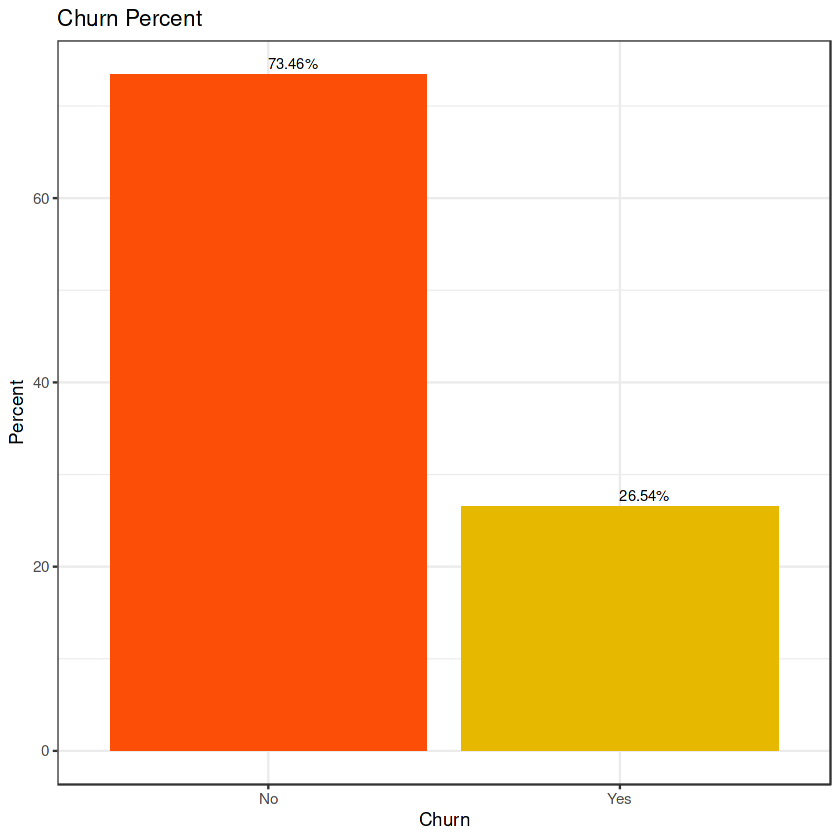

In [ ]:
summary(telco$Churn)
telco %>% 
  group_by(Churn) %>% 
  dplyr::summarise(count = n()) %>% 
  mutate(percent = count/nrow(telco)*100) %>% 
  ggplot(aes(Churn, percent), fill = Churn) +
  geom_col(fill = c("#FC4E07", "#E7B800")) +
  geom_text(aes(label = sprintf("%.2f%%", percent)), hjust = 0.01,vjust = -0.5, size =3) +
  theme_bw() +  
  xlab("Churn") + 
  ylab("Percent") +
  ggtitle("Churn Percent")

## 5. Missing data, label encoding, and factorizing variables<a id="5"></a>

### 5.1 Dealing with missing data<a id="5.1"></a>

I am going to fix the TotalCharges predictor which contains missing values.

**TotalCharges : The total amount charged to the customer**

In [ ]:
telco %>% filter(is.na(TotalCharges)) %>% select(TotalCharges, Churn, tenure, MonthlyCharges)

TotalCharges,Churn,tenure,MonthlyCharges
<dbl>,<fct>,<dbl>,<dbl>
NA,No,0,52.55
NA,No,0,20.25
NA,No,0,80.85
NA,No,0,25.75
NA,No,0,56.05
NA,No,0,19.85
NA,No,0,25.35
NA,No,0,20.00
NA,No,0,19.70


When TotalCharges is NA, tenure is also 0, and only these 11 data in this data set have tenure as 0. By the way, all 11 customers were lost. Since there are only 11 missing data in the TotalCharges field, so getting rid of those rows from the dataset.

In [ ]:
telco <- telco %>% drop_na() 
dim(telco)

[1] 7032   21

### 5.2 Label encoding/factorizing the character variables<a id="5.2"></a>

Besides making sure that the NAs are taken care of, I have also converted character variables into ordinal integers if there is clear ordinality, or into factors if levels are categories without ordinality. I will convert these factors into numeric later on by using the one-hot encoding

In [ ]:
Charcol <- names(telco[,sapply(telco, is.character)])
Charcol

[1] "customerID"       "gender"           "Partner"          "Dependents"      
 [5] "PhoneService"     "MultipleLines"    "InternetService"  "OnlineSecurity"  
 [9] "OnlineBackup"     "DeviceProtection" "TechSupport"      "StreamingTV"     
[13] "StreamingMovies"  "Contract"         "PaperlessBilling" "PaymentMethod"

In [ ]:
cat('There are', length(Charcol), ' columns with character values')

There are 16  columns with character values

There are some categorical features that have 'No' and 'No Internet Service' or 'No Phone Service' as a category, I can make them as 'No' and clean these features.

In [ ]:
telco[telco == "No phone service"] <- "No"
telco[telco == "No internet service"] <- "No"

#### 5.2.1 gender<a id="5.2.1"></a>

**gender : Whether the customer is a male or a female**

In [ ]:
#No ordinality, so converting into factors
telco$gender <- as.factor(telco$gender)
table(telco$gender)


Female   Male 
  3483   3549 

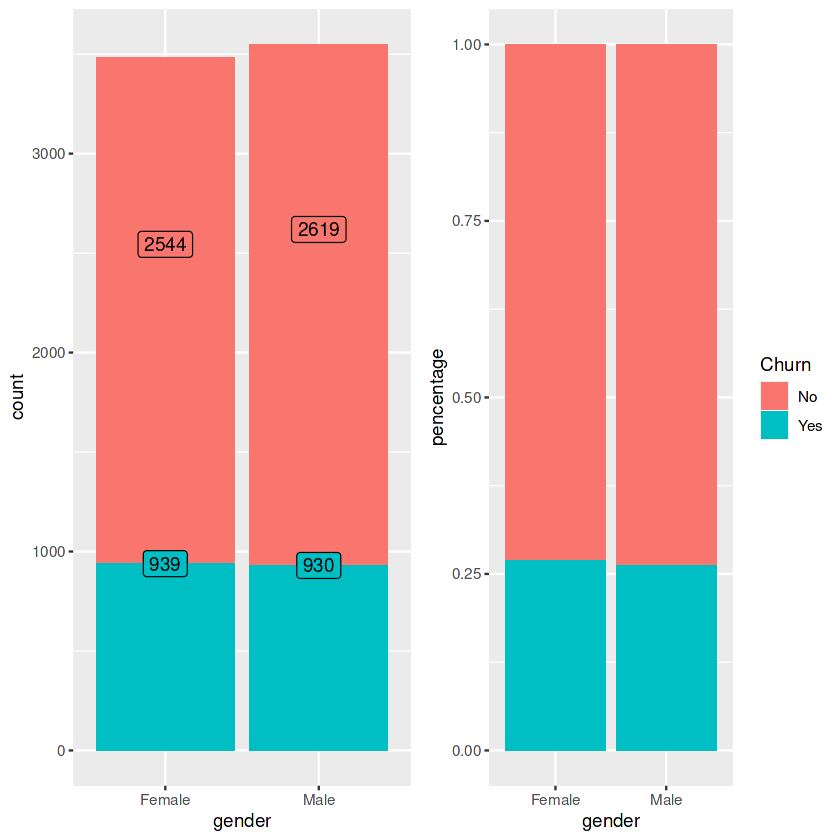

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=gender,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=gender,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

In [ ]:
table(telco$gender)


Female   Male 
  3483   3549 

**The churn percent is almost equal in case of Male and Females**

#### 5.2.2 Partner<a id="5.2.2"></a>

**Partner : Whether the customer has a partner or not**

In [ ]:
telco$Partner <- as.factor(telco$Partner)
telco$Partner <- relevel(telco$Partner, "No", "Yes")

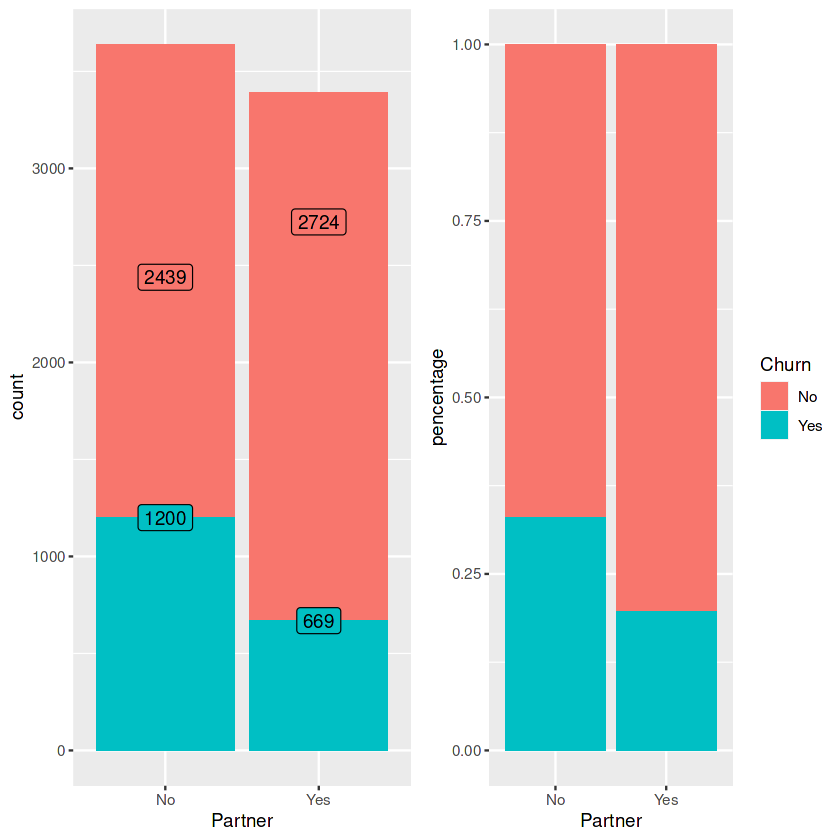

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=Partner,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=Partner,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

**Customers with Partners have lower churn rate as compared to those who don't have partners.**

In [ ]:
table(telco$Partner)


  No  Yes 
3639 3393 

#### 5.2.3 Dependents<a id="5.2.3"></a>

**Dependents : Whether the customer has dependents or not**

In [ ]:
telco$Dependents <- as.factor(telco$Dependents)
telco$Dependents <- relevel(telco$Dependents, "No", "Yes")

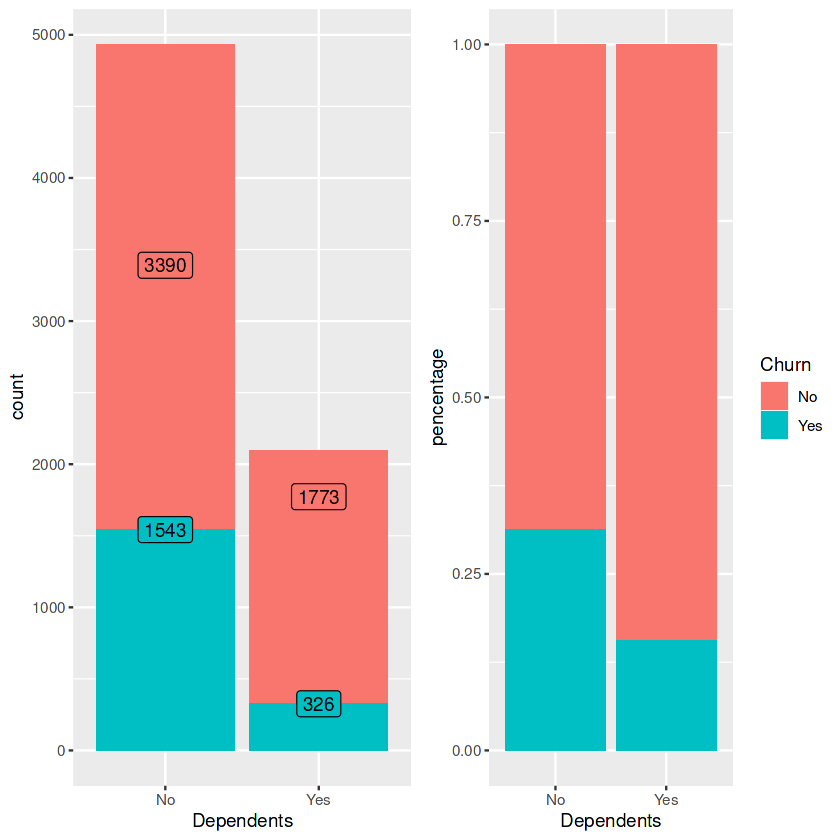

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=Dependents,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=Dependents,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

**Customers with Dependents have lower churn rate as compared to those who don't have Dependents.**

In [ ]:
table(telco$Dependents)


  No  Yes 
4933 2099 

#### 5.2.4 PhoneService<a id="5.2.4"></a>

**PhoneService : Whether the customer has a phone service or not**

In [ ]:
telco$PhoneService <- as.factor(telco$PhoneService)
telco$PhoneService <- relevel(telco$PhoneService, "No", "Yes")

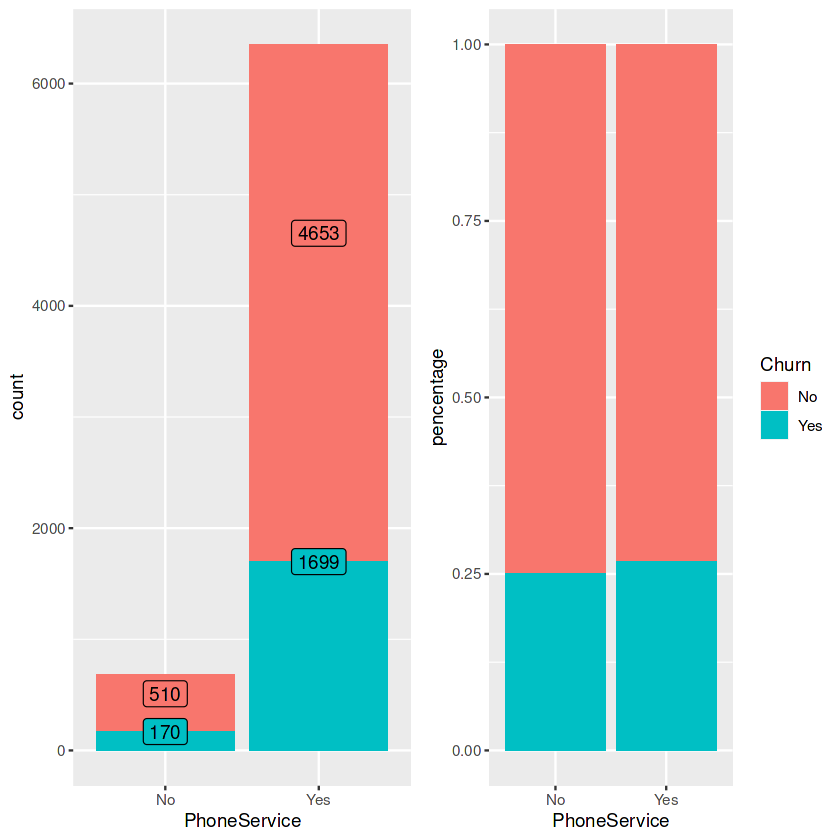

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=PhoneService,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=PhoneService,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

In [ ]:
table(telco$PhoneService)


  No  Yes 
 680 6352 

#### 5.2.5 MultipleLines<a id="5.2.5"></a>

**MultipleLines : Whether the customer has multiple lines or not**

In [ ]:
telco$MultipleLines <- as.factor(telco$MultipleLines)
telco$MultipleLines <- relevel(telco$MultipleLines, "No", "Yes")

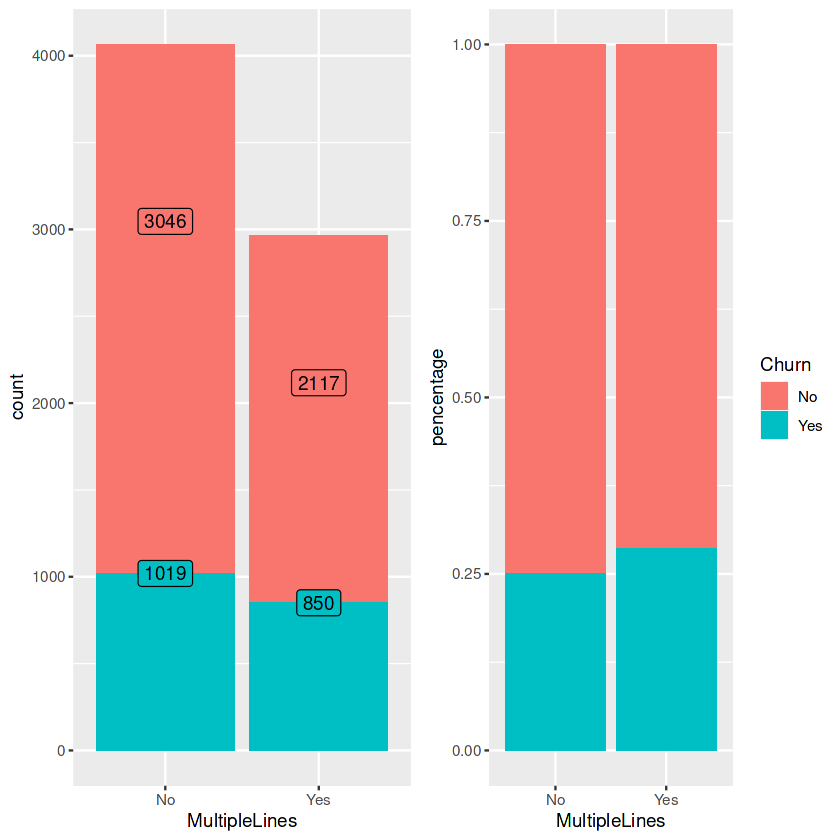

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=MultipleLines,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=MultipleLines,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

**Customers that have phone service seems to have higher churn rate compared to those who don't have phone service.**

In [ ]:
table(telco$MultipleLines)


  No  Yes 
4065 2967 

#### 5.2.6 Internet variables<a id="5.2.6"></a>

There are 7 predict variables are related with internet service, which are 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' and 'StreamingMovies'.

 **InternetService : Customer’s internet service provider**

In [ ]:
telco$InternetService <- as.factor(telco$InternetService)

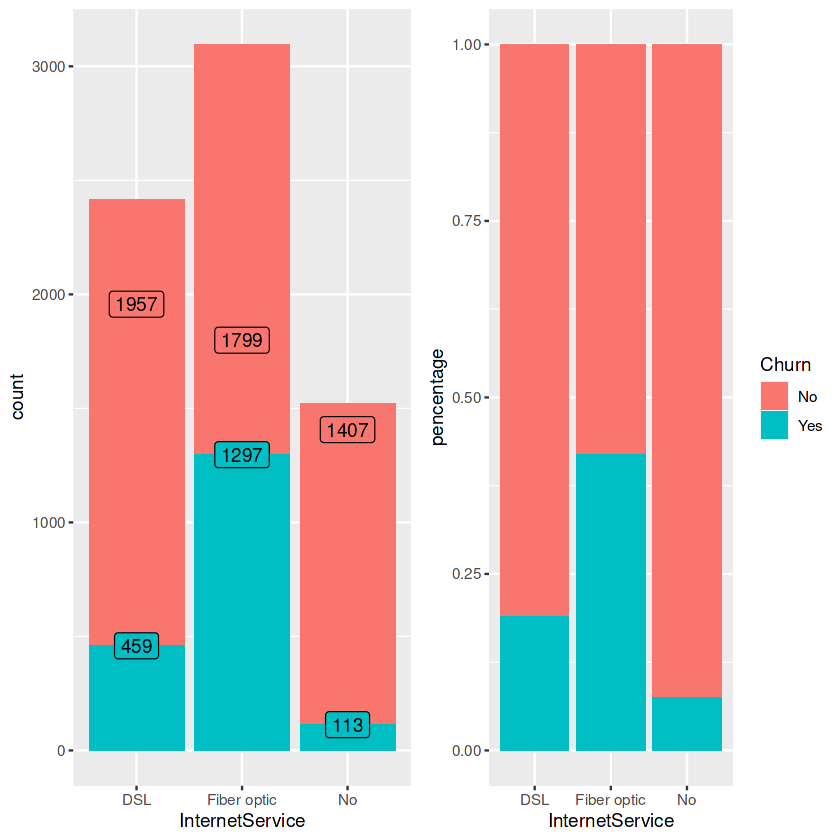

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=InternetService,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=InternetService,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

**Churn rate is much higher in case of Fiber Optic InternetServices.** 

In [ ]:
table(telco$InternetService)


        DSL Fiber optic          No 
       2416        3096        1520 

**OnlineSecurity : Whether the customer has online security or not**

In [ ]:
telco$OnlineSecurity <- as.factor(telco$OnlineSecurity)
telco$OnlineSecurity <- relevel(telco$OnlineSecurity, "No", "Yes")

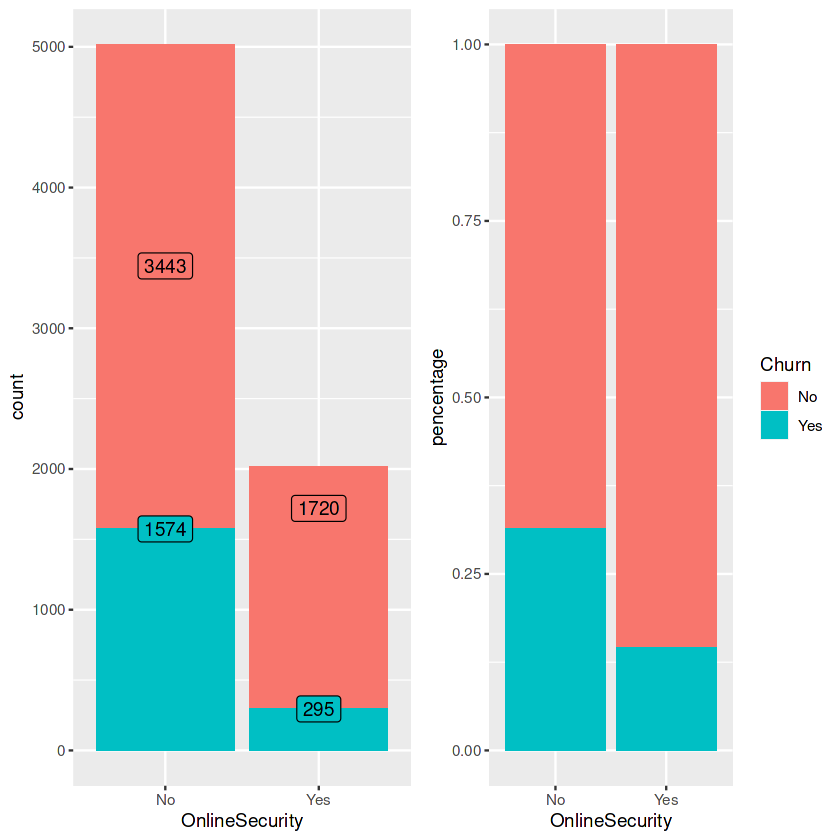

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=OnlineSecurity,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=OnlineSecurity,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

In [ ]:
table(telco$OnlineSecurity)


  No  Yes 
5017 2015 

**OnlineBackup : Whether the customer has online backup or not**

In [ ]:
telco$OnlineBackup <- as.factor(telco$OnlineBackup)
telco$OnlineBackup <- relevel(telco$OnlineBackup, "No", "Yes")

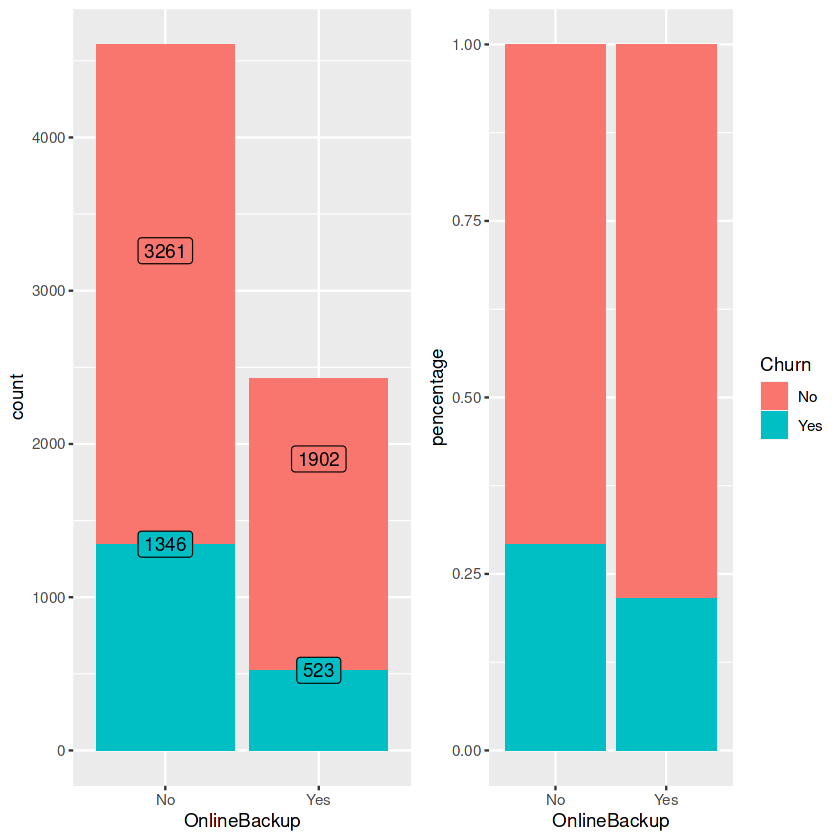

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=OnlineBackup,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=OnlineBackup,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

In [ ]:
table(telco$OnlineBackup)


  No  Yes 
4607 2425 

**DeviceProtection : Whether the customer has device protection or not**

In [ ]:
telco$DeviceProtection <- as.factor(telco$DeviceProtection)
telco$DeviceProtection <- relevel(telco$DeviceProtection, "No", "Yes")

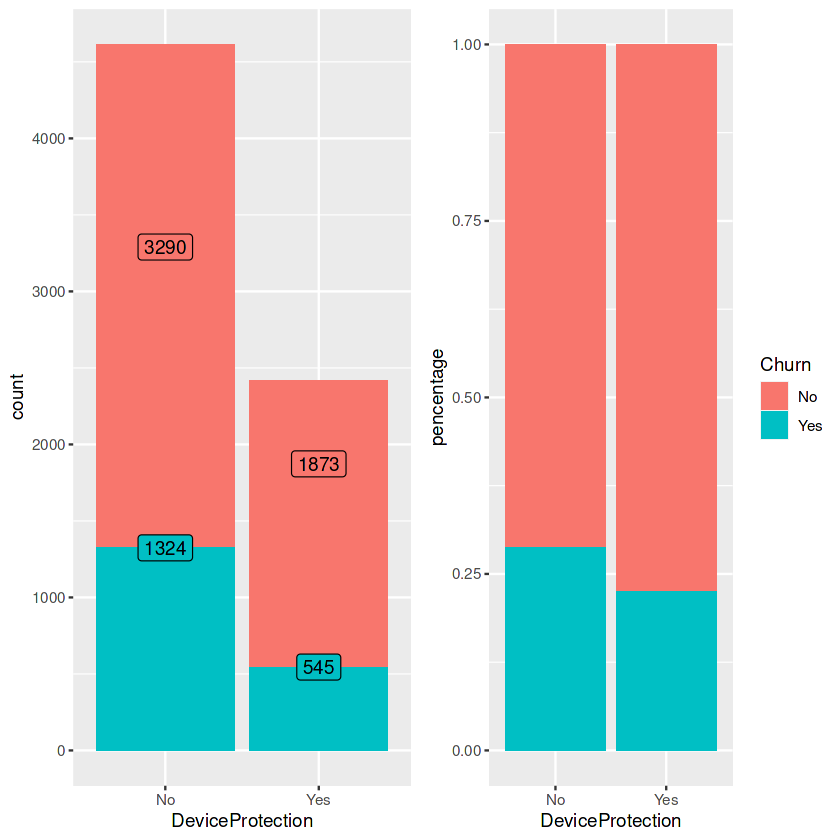

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=DeviceProtection,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=DeviceProtection,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

In [ ]:
table(telco$DeviceProtection)


  No  Yes 
4614 2418 

**TechSupport : Whether the customer has tech support or not**

In [ ]:
telco$TechSupport <- as.factor(telco$TechSupport)
telco$TechSupport <- relevel(telco$TechSupport, "No", "Yes")

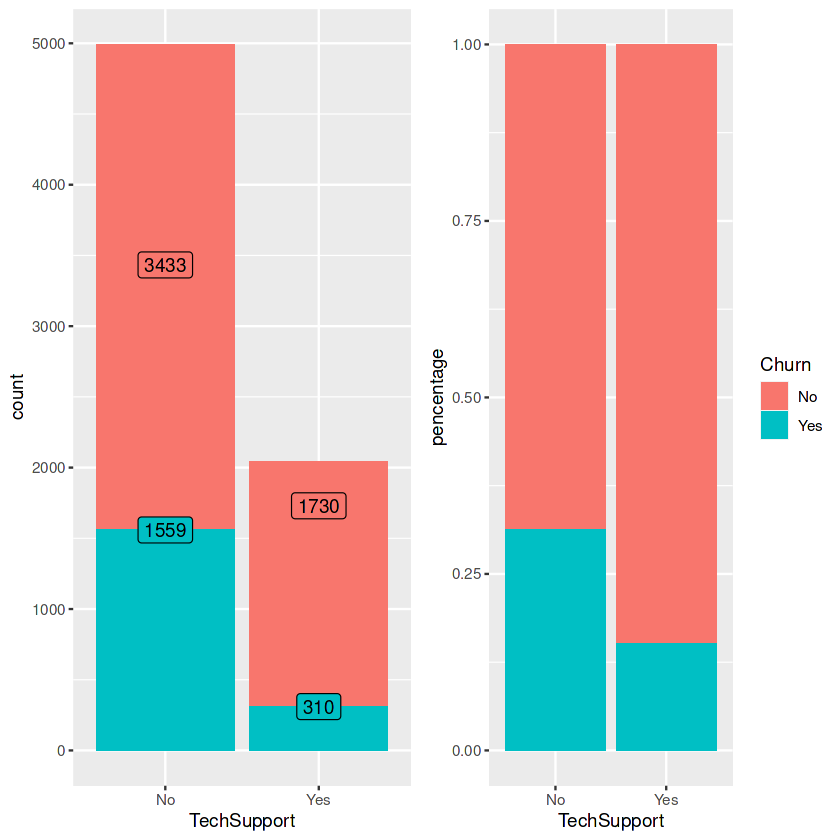

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=TechSupport,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=TechSupport,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

In [ ]:
table(telco$TechSupport)


  No  Yes 
4992 2040 

**StreamingTV : Whether the customer has streaming TV or not**

In [ ]:
telco$StreamingTV <- as.factor(telco$StreamingTV)
telco$StreamingTV <- relevel(telco$StreamingTV, "No", "Yes")

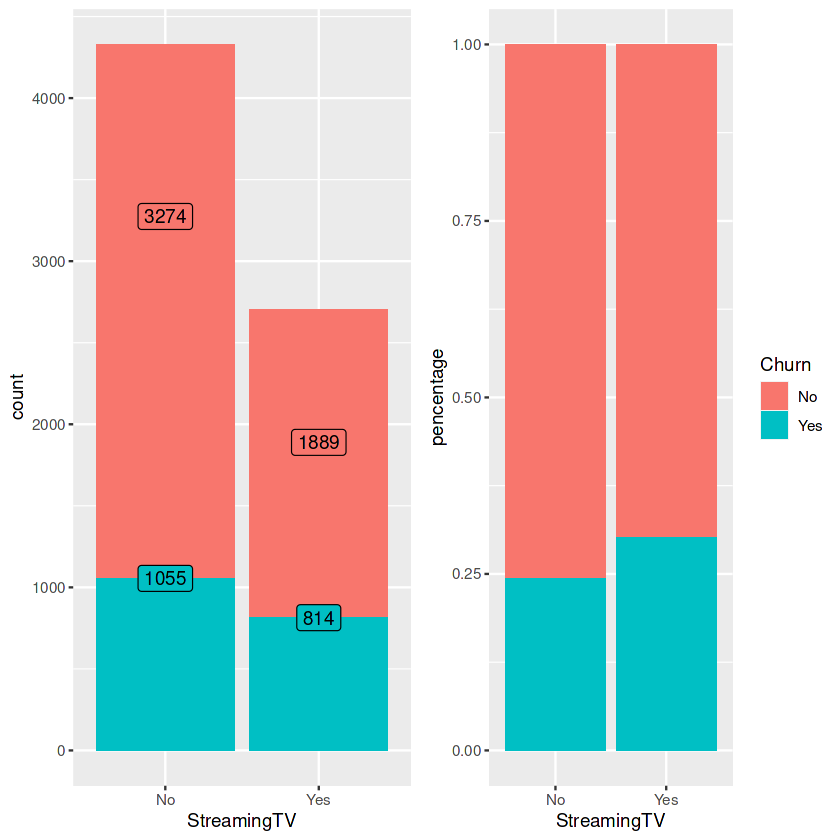

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=StreamingTV,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=StreamingTV,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

In [ ]:
table(telco$StreamingTV)


  No  Yes 
4329 2703 

**StreamingMovies : Whether the customer has streaming movies or not**

In [ ]:
telco$StreamingMovies <- as.factor(telco$StreamingMovies)
telco$StreamingMovies <- relevel(telco$StreamingMovies, "No", "Yes")

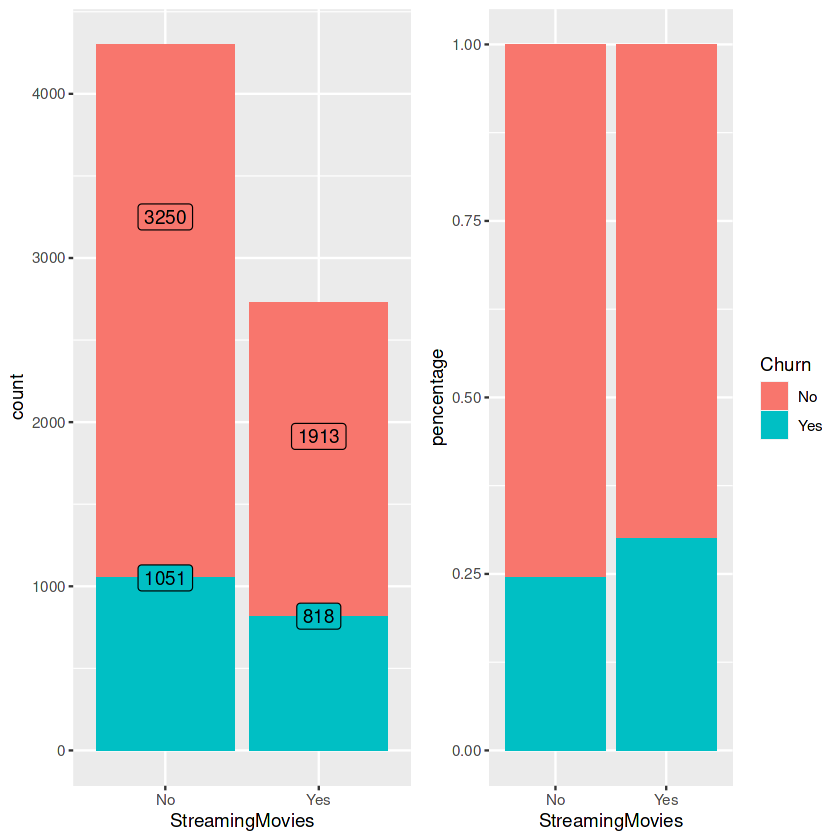

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=StreamingMovies,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=StreamingMovies,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

In [ ]:
table(telco$StreamingMovies)


  No  Yes 
4301 2731 

#### 5.2.7 Contract<a id="5.2.7"></a>

**Contract : The contract term of the customer**

In [ ]:
telco$Contract <- as.factor(telco$Contract)

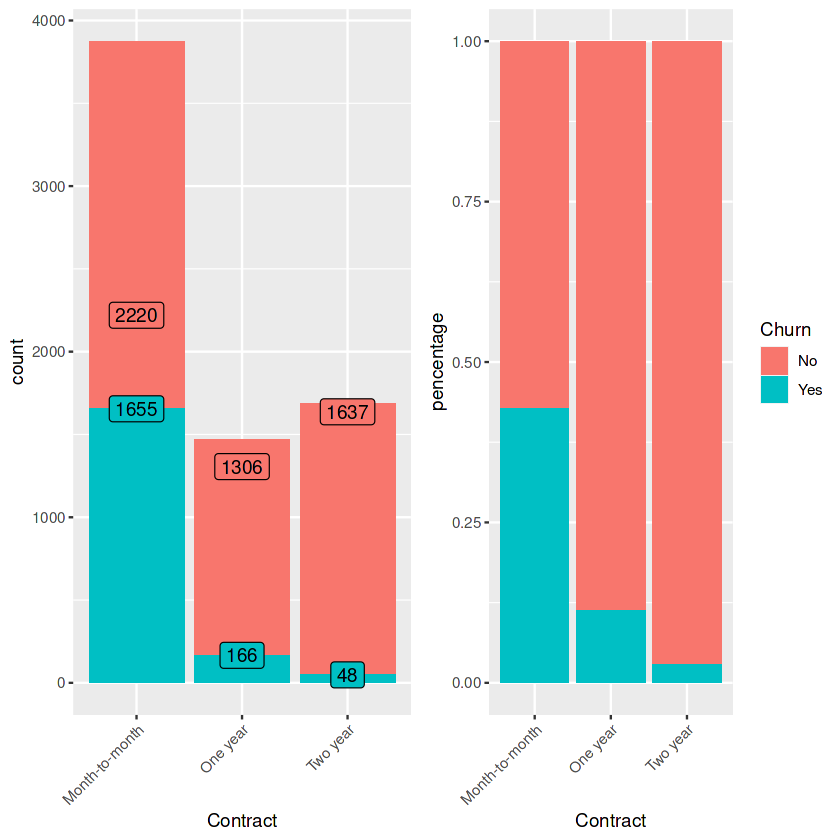

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=Contract,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)),
#In terms of percentage
ggplot(telco, aes(x=Contract,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage") +
theme(axis.text.x = element_text(angle = 45, hjust = 1))
)

**A larger percent of Customers with monthly subscription have left when compared to Customers with one or two year contract.**

In [ ]:
table(telco$Contract)


Month-to-month       One year       Two year 
          3875           1472           1685 

#### 5.2.8 PaperlessBilling<a id="5.2.8"></a>

**PaperlessBilling : Whether the customer has paperless billing or not**

In [ ]:
telco$PaperlessBilling <- as.factor(telco$PaperlessBilling)
telco$PaperlessBilling <- relevel(telco$PaperlessBilling, "No", "Yes")

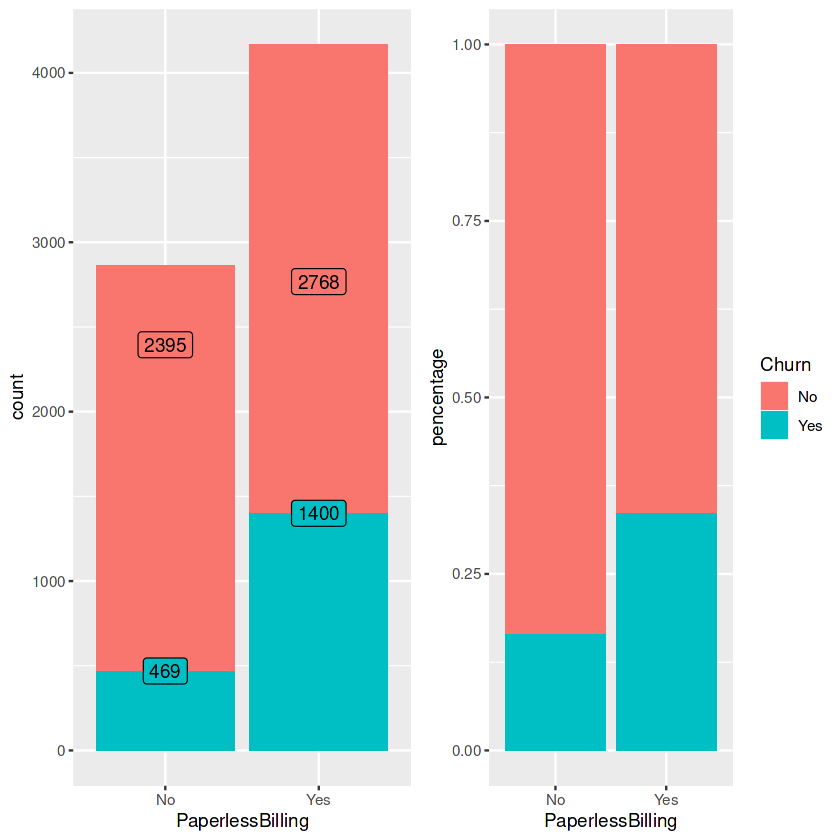

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=PaperlessBilling,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=PaperlessBilling,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

**Churn percent is higher in case of cutsomers having paperless billing option.**

In [ ]:
table(telco$PaperlessBilling)


  No  Yes 
2864 4168 

#### 5.2.9 PaymentMethod<a id="5.2.9"></a>

In [ ]:
telco$PaymentMethod <- as.factor(telco$PaymentMethod)

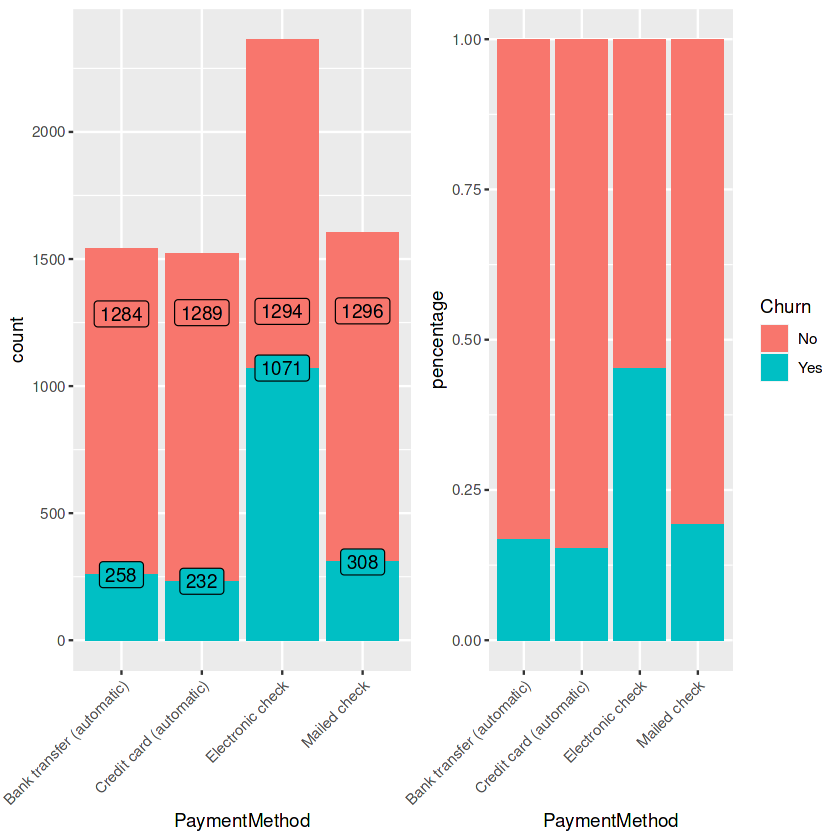

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=PaymentMethod,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)),
#In terms of percentage
ggplot(telco, aes(x=PaymentMethod,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage") +
theme(axis.text.x = element_text(angle = 45, hjust = 1))
)

In [ ]:
table(telco$PaymentMethod)


Bank transfer (automatic)   Credit card (automatic)          Electronic check 
                     1542                      1521                      2365 
             Mailed check 
                     1604 

**Customers who have ElectronicCheck PaymentMethod tend to leave the platform more when compared to other options.**

#### 5.2.10 SeniorCitizen<a id="5.2.10"></a>

'SeniorCitizen' is in 'int' form that can be changed to factor.

  **SeniorCitizen : Whether the customer is a senior citizen or not**

In [ ]:
telco$SeniorCitizen <- as.factor(ifelse(telco$SeniorCitizen == 1, "Yes", "No"))
telco$SeniorCitizen <- relevel(telco$SeniorCitizen, "No", "Yes")

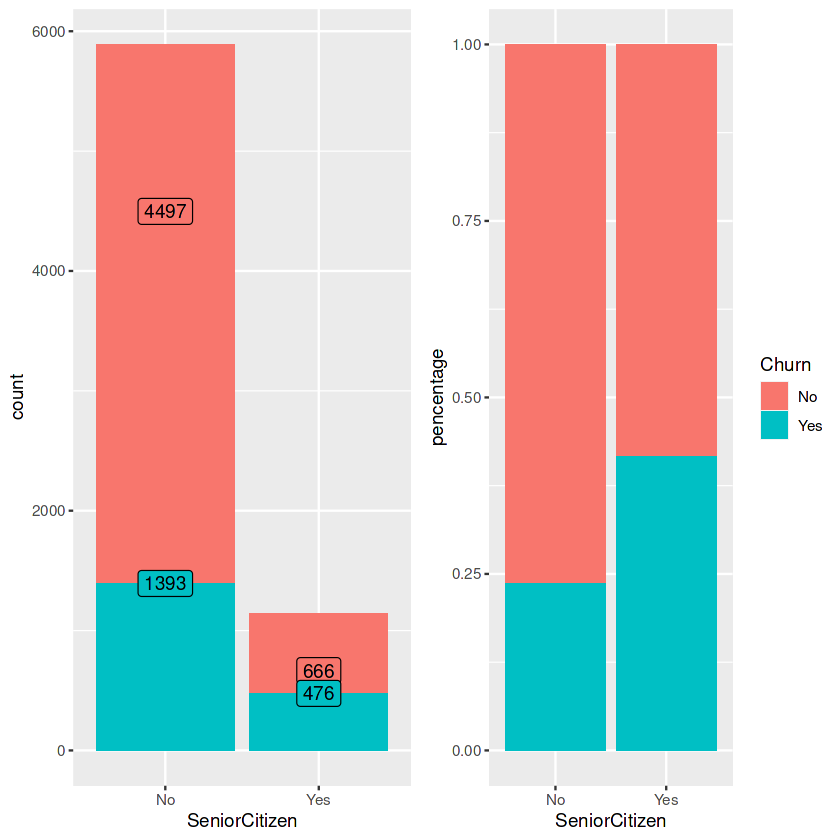

In [ ]:
ggarrange(
#In terms of quantity
ggplot(telco, aes(x=SeniorCitizen,fill=Churn)) + 
  geom_bar() +
  geom_label(stat = "count", aes(label = ..count.., y = ..count..)) +
  theme(legend.position = "none"),
#In terms of percentage
ggplot(telco, aes(x=SeniorCitizen,fill=Churn))+ geom_bar(position = "fill") +
 ylab("pencentage")
)

**The percent of churn is higher in case of senior citizens**

In [ ]:
table(telco$SeniorCitizen)


  No  Yes 
5890 1142 

### 5.3 Analyzing the continuous variables and discover correlations<a id="5.3"></a>

In [ ]:
numericVars <- which(map(telco, is.numeric) == T)#index vector numeric variables
numericVarNames <- names(numericVars)#saving names vector for use later on
cat('There are', length(numericVars), 'numeric variables')

There are 3 numeric variables

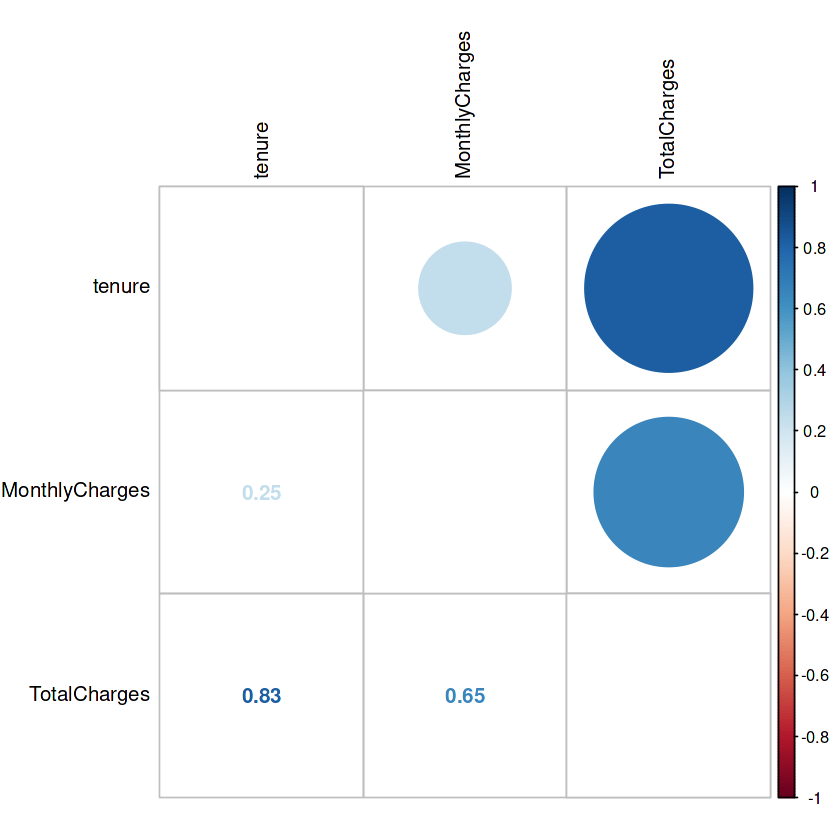

In [ ]:
#find correlations of all numeric variables
telco_numVar <- telco[, numericVars]
cor_numVar <- as.matrix(cor(telco_numVar, use="pairwise.complete.obs"))#pairwise.complete.obs uses the non-NA values when calculating the correlation. 

#visiualization
corrplot.mixed(cor_numVar, tl.col = "black", tl.pos = "lt")

The correlation between 'tenure' and 'TotalCharges' is very high (0.83), which is a multicollinearity issue.

#### 5.3.1 tenure<a id="5.3.1"></a>

**tenure : Number of months the customer has stayed with the company**

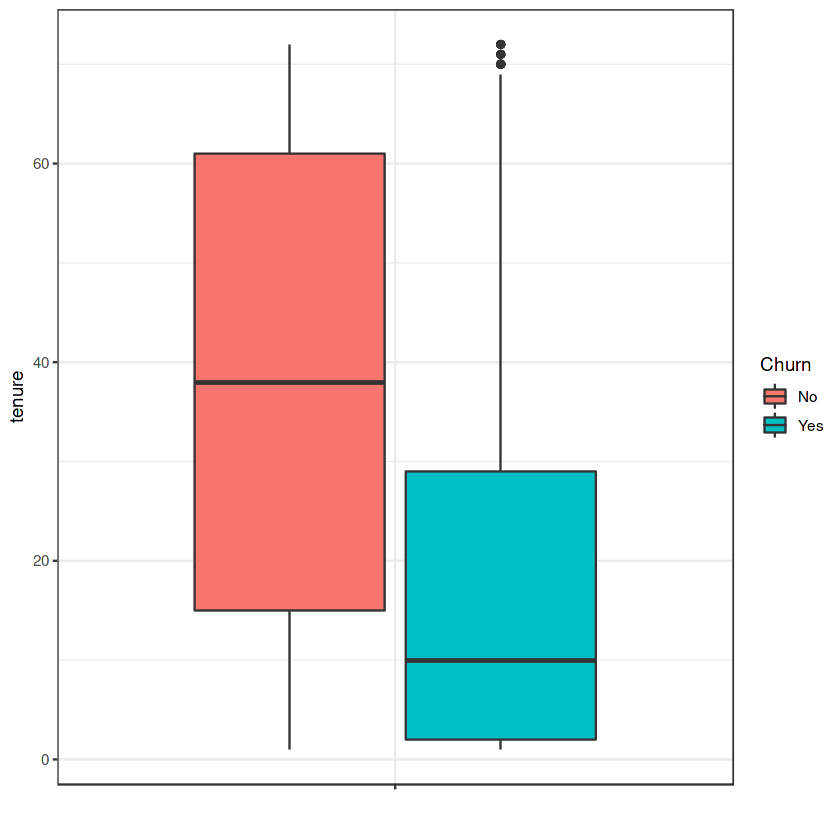

In [ ]:
ggplot(telco, aes(y= tenure, x = "", fill = Churn)) + 
geom_boxplot()+ 
theme_bw() +
xlab(" ")

**The median tenure for customers who have left is around 10 months.**

#### 5.3.2 MonthlyCharges<a id="5.3.2"></a>

**MonthlyCharges : The amount charged to the customer monthly**

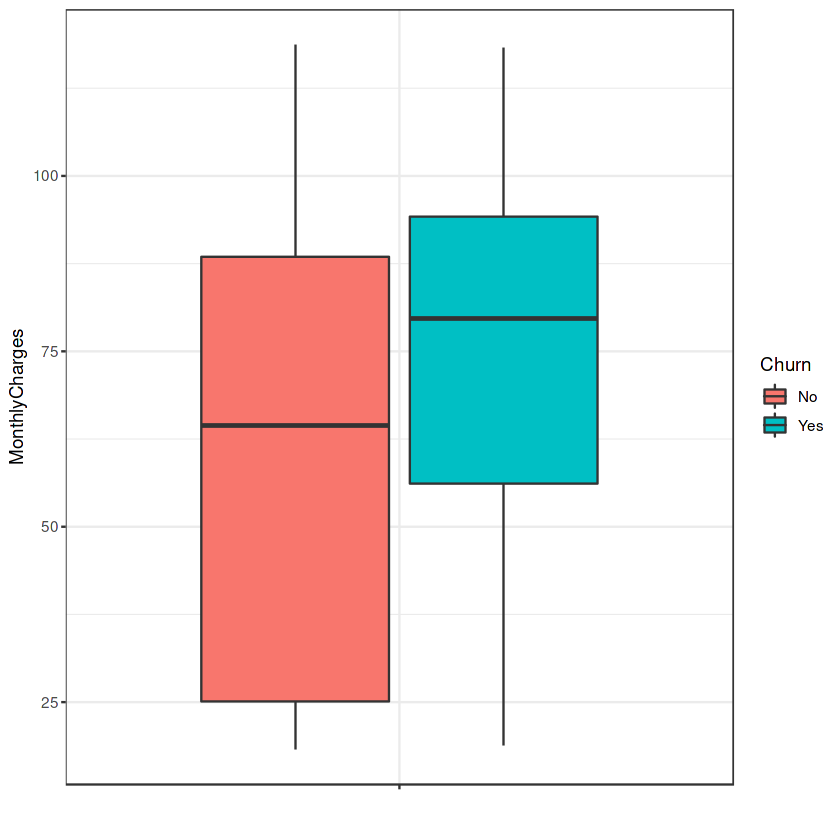

In [ ]:
ggplot(telco, aes(y= MonthlyCharges, x = "", fill = Churn)) + 
geom_boxplot()+ 
theme_bw() +
xlab(" ")

**Customers who have churned, have high monthly charges. The median is above 75.**

#### 5.3.3 TotalCharges<a id="5.3.3"></a>

**TotalCharges : The total amount charged to the customer**

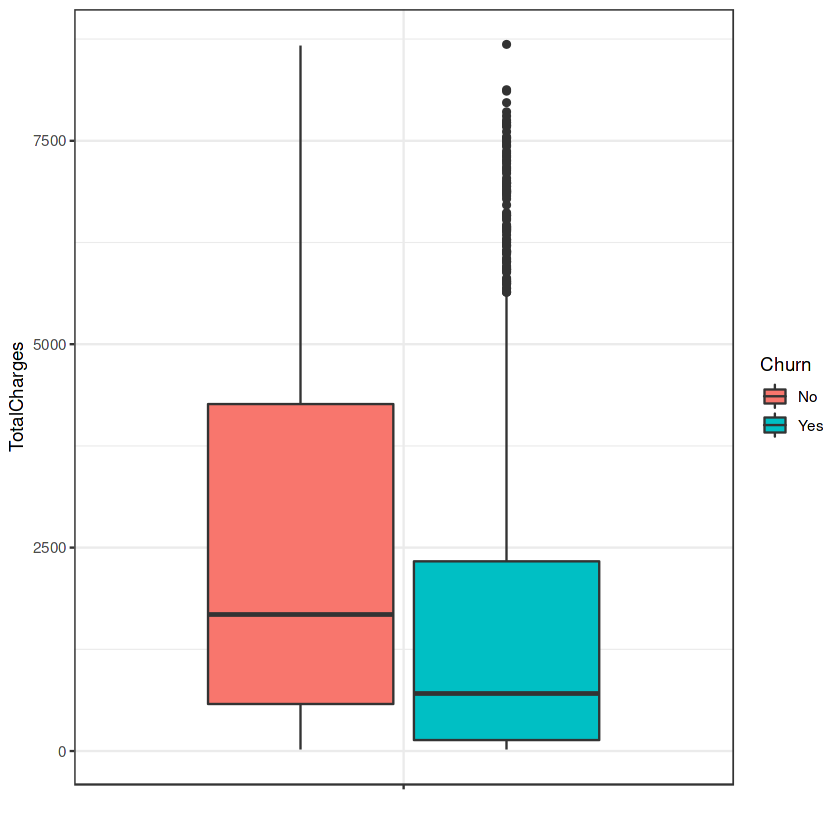

In [ ]:
ggplot(telco, aes(y= TotalCharges, x = "", fill = Churn)) + 
geom_boxplot()+ 
theme_bw() +
xlab(" ")

**The median Total charges of customers who have churned is low.**

### 5.4 Checking outliers in continous variables<a id="5.4"></a>

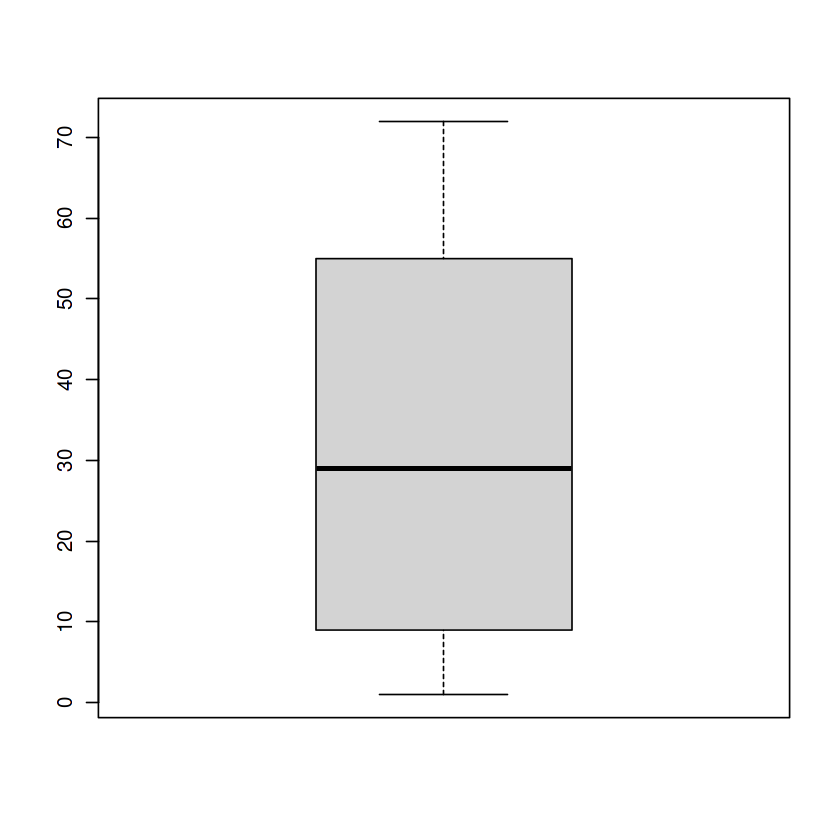

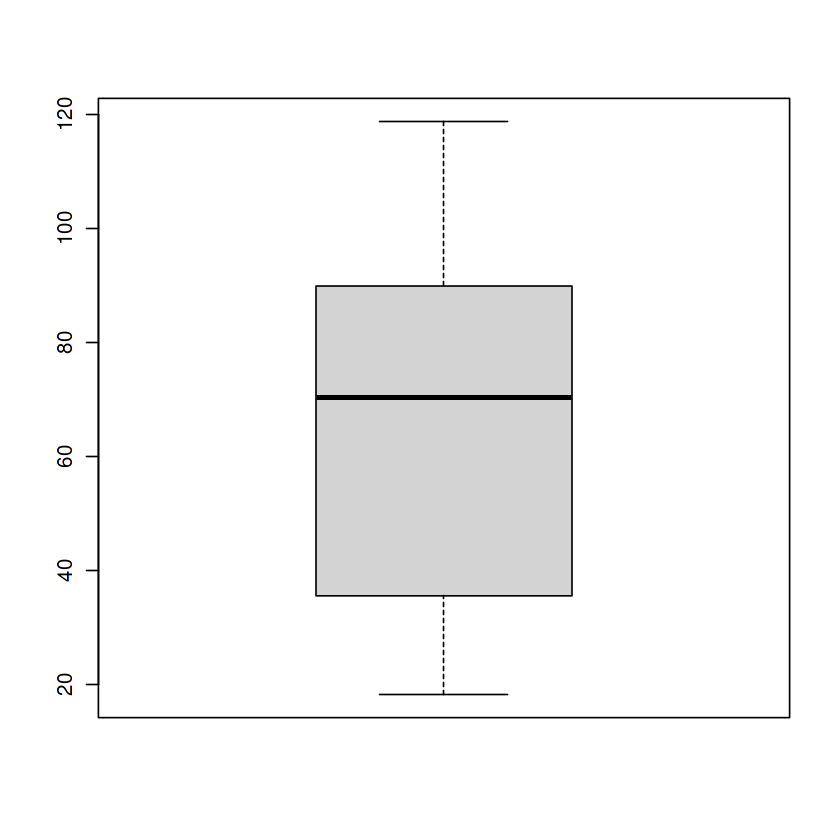

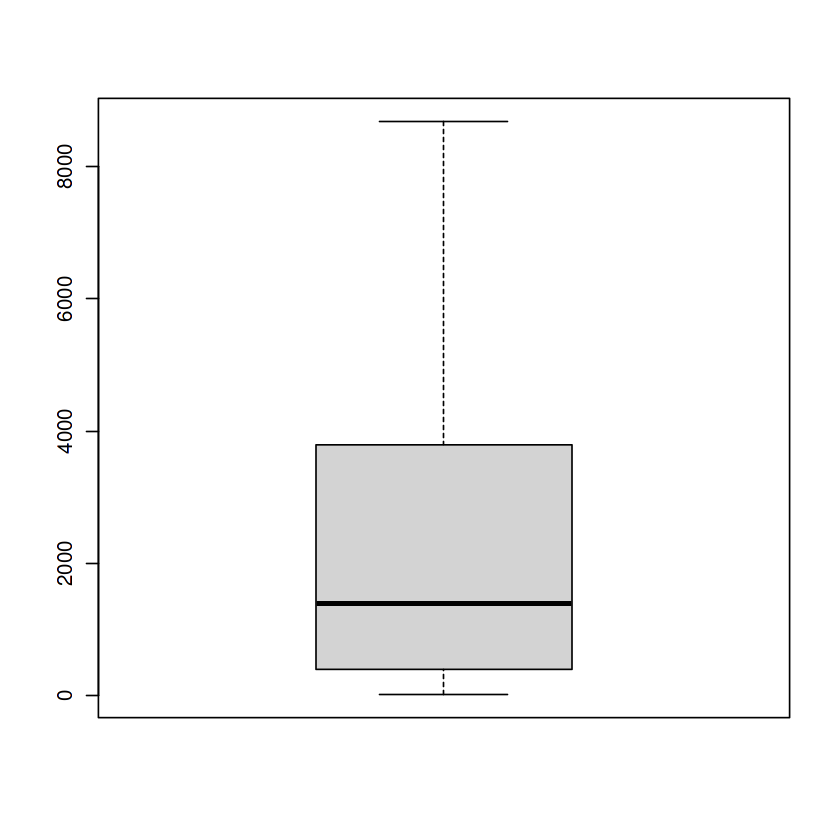

In [ ]:
boxplot(telco$tenure)
boxplot(telco$MonthlyCharges)
boxplot(telco$TotalCharges)

**It seems none of the values are outliers here.**

### 6. Feature engineering<a id="6"></a>

#### 6.1 tenure_bin<a id="6.1"></a>

I am trying to create a derived feature from tenure, where I have made different bins of tenure(which is in months) such as '0-1 year', '2-3 years', '3-4 years' etc.

In [ ]:
telco <- telco %>%  mutate(tenure_bin = tenure)

telco$tenure_bin[telco$tenure_bin >=0 & telco$tenure_bin <= 12] <- '0-1 year'
telco$tenure_bin[telco$tenure_bin > 12 & telco$tenure_bin <= 24] <- '1-2 years'
telco$tenure_bin[telco$tenure_bin > 24 & telco$tenure_bin <= 36] <- '2-3 years'
telco$tenure_bin[telco$tenure_bin > 36 & telco$tenure_bin <= 48] <- '3-4 years'
telco$tenure_bin[telco$tenure_bin > 48 & telco$tenure_bin <= 60] <- '4-5 years'
telco$tenure_bin[telco$tenure_bin > 60 & telco$tenure_bin <= 72] <- '5-6 years'

telco$tenure_bin <- as.factor(telco$tenure_bin)

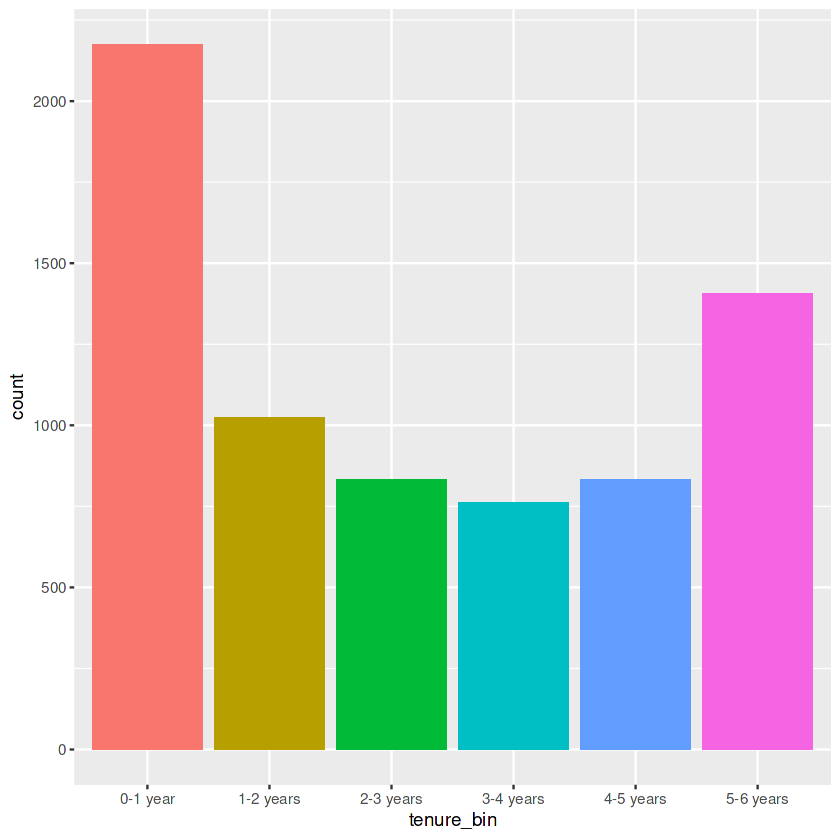

In [ ]:
ggplot(telco, aes(tenure_bin, fill = tenure_bin)) + geom_bar() + theme(legend.position = "None")

### 7. Preparing data for modeling<a id="7"></a>

#### 7.1 Dropping highly correlated variables<a id="7.1"></a>

The correlation between 'tenure' and 'TotalCharges' is high(correlation > 0.8). I will see the correlation between each of them with the response variable and then decide to drop which of them.

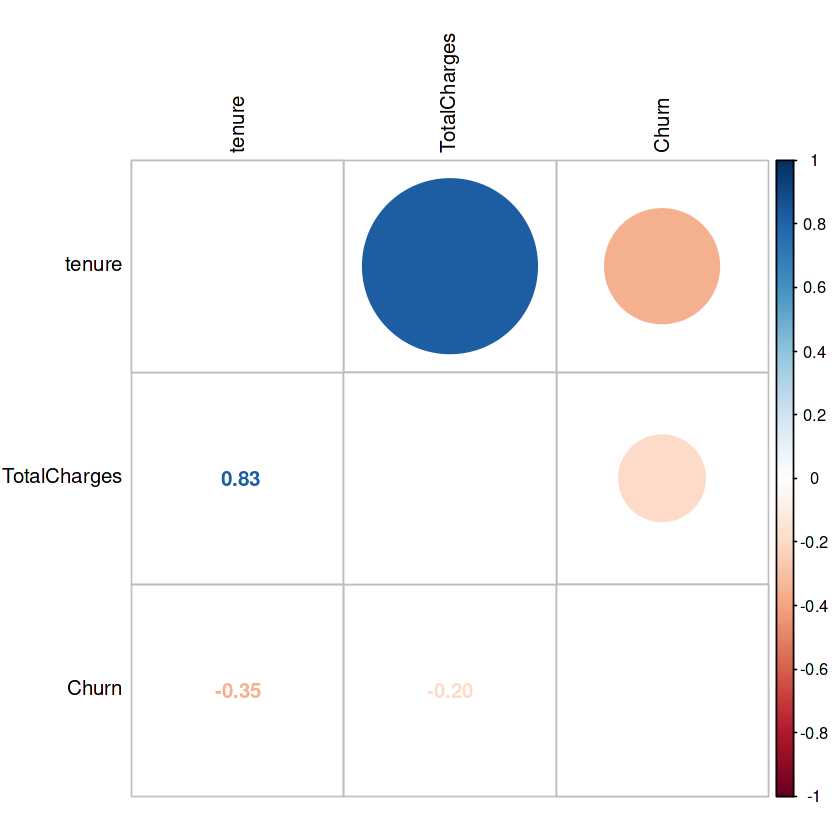

In [ ]:
correlation <- data.frame(tenure = telco$tenure, 
                          TotalCharges = telco$TotalCharges,
                          Churn = telco$Churn)
correlation$Churn <- as.integer(revalue(telco$Churn, c("No" = 0, "Yes" = 1)))

cor <- as.matrix(cor(correlation, use="pairwise.complete.obs"))
corrplot.mixed(cor, tl.col = "black", tl.pos = "lt")

* tenure(Keep) & TotalCharges(Drop)

In [ ]:
telco <- telco %>% select(-TotalCharges)

#### 7.2 PreProcessing predictor variables<a id="7.2"></a>

In [ ]:
numericVarNames <- numericVarNames[!(numericVarNames %in% c('TotalCharges'))]  
DFnumeric <- telco[, names(telco) %in% numericVarNames]

DFfactors <- telco[, !(names(telco) %in% numericVarNames)]
DFfactors <- DFfactors[, !(names(DFfactors) %in% 'customerID')]

In [ ]:
str(DFnumeric)

tibble [7,032 × 2] (S3: tbl_df/tbl/data.frame)
 $ tenure        : num [1:7032] 1 34 2 45 2 8 22 10 28 62 ...
 $ MonthlyCharges: num [1:7032] 29.9 57 53.9 42.3 70.7 ...


In [ ]:
str(DFfactors)

tibble [7,032 × 18] (S3: tbl_df/tbl/data.frame)
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 1 2 1 2 ...
 $ OnlineBackup    : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 2 1 1 2 ...
 $ DeviceProtection: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 1 ...
 $ TechSupport     : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 2 1 ...
 $ StreamingTV     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ StreamingMovies : Fa

In [ ]:
cat('There are', length(DFnumeric), 'numeric variables, and', length(DFfactors)-1, 'factor variables')#扣掉結果變數

There are 2 numeric variables, and 17 factor variables

#### 7.3 Normalizing and Standardizing the data<a id="7.3"></a>

Normalizing歸一化(對篇度大於0.8的數值變數進行對數變換)

In [ ]:
for(i in 1:ncol(DFnumeric)){
        if (abs(skew(DFnumeric[,i]))>0.8){
                DFnumeric[,i] <- log(DFnumeric[,i] +1)
        }
}

I don't plan to standardize the data here, because the models I will use such as random forest and XGBoost are not sensitive to the distance of the value. 

#### 7.4 One hot encoding the categorical variables<a id="7.4"></a>

In [ ]:
DFdummies <- as.data.frame(model.matrix(~.-1, DFfactors))#函數格式為(~你想編碼的列名-1，數據集名稱)
dim(DFdummies)

[1] 7032   27

看看有無單熱變數並沒有1的值而都是0，將那些變數拿掉

In [ ]:
#check if some values are absent in the data set
ZerocolTest <- which(colSums(DFdummies)==0)#從第1458+1=1459row開始為train set(SalePrice不為na)
colnames(DFdummies[ZerocolTest])#全部單熱變數皆有1的值

character(0)

In [ ]:
combined <- cbind(DFnumeric, DFdummies) #combining all (now numeric) predictors into one dataframe
head(combined)

,tenure,MonthlyCharges,genderFemale,genderMale,SeniorCitizenYes,PartnerYes,DependentsYes,PhoneServiceYes,MultipleLinesYes,InternetServiceFiber optic,⋯,PaperlessBillingYes,PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check,ChurnYes,tenure_bin1-2 years,tenure_bin2-3 years,tenure_bin3-4 years,tenure_bin4-5 years,tenure_bin5-6 years
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6931472,3.429137,1,0,0,1,0,0,0,0,⋯,1,0,1,0,0,0,0,0,0,0
2,3.5553481,4.059581,0,1,0,0,0,1,0,0,⋯,0,0,0,1,0,0,1,0,0,0
3,1.0986123,4.004602,0,1,0,0,0,1,0,0,⋯,1,0,0,1,1,0,0,0,0,0
4,3.8286414,3.768153,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
5,1.0986123,4.272491,1,0,0,0,0,1,0,1,⋯,1,0,1,0,1,0,0,0,0,0
6,2.1972246,4.611649,1,0,0,0,0,1,1,1,⋯,1,0,1,0,1,0,0,0,0,0


#### 7.5 Splitting train and test sets<a id="7.5"></a>

In [ ]:
set.seed(123)
train.index = sample(x=1:nrow(combined),size=ceiling(0.7*nrow(combined)))
training = combined[train.index,]
testing = combined[-train.index,]

### 8. Modeling<a id="8"></a>

#### 8.1 Random Forest<a id="8.1"></a>

因為前面將結果變數轉為1與0了，這裡要轉回Yes跟No

In [ ]:
colnames(training)[24] <- "Churn"
training$Churn <- as.factor(ifelse(training$Churn==0, "No", "Yes"))

Tuning Parameters

In [ ]:
#There are 28 variables in the data so I decide to try mtry in 1 : 20
tuneGrid <- expand.grid(.mtry = c(1 : 20))
ctrl <- trainControl(method = "cv", 
                     number = 5,
                     search = "grid",
                     classProbs = TRUE,
                     summaryFunction = twoClassSummary)
ntrees <- c(500, 1000)
nodesize <- c(1,5)
params <- expand.grid(ntrees = ntrees,
                      nodesize = nodesize)

As I want to limit the running time on Kaggle, I disabled the code, and just continuing with the results. According to caret, the ‘bestTune’ parameters are:

* ntrees: 500
  
* nodesize: 5 
  
* mtry: 4


In [ ]:
#store_maxnode <- vector("list", nrow(params))
#for(i in 1:nrow(params)){
  #nodesize <- params[i,2]
  #ntree <- params[i,1]
  #set.seed(876)
  #rf_model <- train(Churn~.,
                    #data = training,
                    #method = "rf",
                    #importance = T,
                    #metric = "ROC",
                    #tuneGrid = tuneGrid,
                    #trControl = ctrl,
                    #ntree = ntree,
                    #nodesize = nodesize
                    #)
  #store_maxnode[[i]] <- rf_model
#}

##Save model
#save(rf_model, file =  "model_params.RData.randomforest")

##Load model
#load(file =  "model_params.RData.randomforest")

##In order to avoid generic model names - model1, model2 ... we can name the resulting list with the corresponding parameters:
#names(store_maxnode) <- paste("ntrees:", params$ntrees,
                          #"nodesize:",params$nodesize)


##combine results
#results_mtry <- resamples(store_maxnode)
#summary(results_mtry)

##To get the best average performance for each model
#lapply(store_maxnode, function(x) x$results[x$results$ROC == max(x$results$ROC),])

In [ ]:
tuneGrid <- expand.grid(.mtry = 4)
fit_rf <- train(Churn~.,
    data = training,
    method = "rf",
    metric = "ROC",
    tuneGrid = tuneGrid,
    trControl = ctrl,
    importance = TRUE,
    nodesize = 5,
    ntree = 500
    )

save(fit_rf, file =  "model_final.RData.randomforest")
load( file =  "model_final.RData.randomforest")

In [ ]:
colnames(testing)[24] <- "Churn"
testing$Churn <- as.factor(ifelse(testing$Churn==0, "No", "Yes")) 
prediction_rf <- predict(fit_rf, newdata = testing[,-24])
confusionMatrix(prediction_rf, testing$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1425  285
       Yes  124  275
                                          
               Accuracy : 0.8061          
                 95% CI : (0.7885, 0.8227)
    No Information Rate : 0.7345          
    P-Value [Acc > NIR] : 8.916e-15       
                                          
                  Kappa : 0.4526          
                                          
 Mcnemar's Test P-Value : 2.543e-15       
                                          
            Sensitivity : 0.9199          
            Specificity : 0.4911          
         Pos Pred Value : 0.8333          
         Neg Pred Value : 0.6892          
             Prevalence : 0.7345          
         Detection Rate : 0.6757          
   Detection Prevalence : 0.8108          
      Balanced Accuracy : 0.7055          
                                          
       'Positive' Class : No              
                        

Accuracy : 0.8061

The importance of the variables

In [ ]:
varImp(fit_rf)

rf variable importance

  only 20 most important variables shown (out of 28)

                                Importance
tenure                              100.00
MonthlyCharges                       48.95
`InternetServiceFiber optic`         47.56
`ContractOne year`                   39.44
`ContractTwo year`                   36.88
OnlineSecurityYes                    34.81
InternetServiceNo                    33.57
TechSupportYes                       30.32
PaperlessBillingYes                  27.61
`PaymentMethodElectronic check`      24.41
`tenure_bin5-6 years`                19.25
MultipleLinesYes                     19.16
StreamingTVYes                       19.07
`tenure_bin4-5 years`                18.67
OnlineBackupYes                      16.27
StreamingMoviesYes                   15.73
DependentsYes                        14.55
PhoneServiceYes                      14.03
DeviceProtectionYes                  12.37
`tenure_bin2-3 years`                11.99

#### 8.2 XGBoost<a id="8.2"></a>

Finding best parameters using caret，There are 3600 sets of parameters.

In [ ]:
grid_tune <- expand.grid(
  nrounds = c(500, 1000, 1500),
  max_depth = c(2, 3, 4, 5, 6),
  eta = c(0.01, 0.05, 0.1, 0.3), 
  gamma = 0,
  colsample_bytree = c(0.4, 0.6, 0.8, 1.0),
  min_child_weight = c(1, 2, 3, 4, 5), 
  subsample = c(0.5, 0.75, 1.0)
  )
nrow(grid_tune) #有3600種組合

[1] 3600

The next step is to let caret find the best hyperparameter values (using 5 fold cross validation).

In [ ]:
#xgb_tune <- train(Churn~., 
                  #data = training, 
                  #trControl = ctrl,
                  #tuneGrid = grid_tune, 
                  #method = "xgbTree",
                  #verbose = T,
                  #verbosity = 0)

#save(xgb_tune, file = "model_params.Rdata.xgboost")

In [ ]:
#load(file = "model_params.Rdata.xgboost")

As expected, this took quite a bit of time (locally). As I want to limit the running time on Kaggle, I disabled the code, and am just continuing with the results. According to caret, the ‘bestTune’ parameters are:

  * nrounds = 1000

  * max_depth = 2

  * eta = 0.01

  * gamma = 0

  * colsample_bytree = 0.4

  * min_child_weight = 3

  * subsample = 0.5

In the remainder of this section, I will continue to work with the xgboost package directly. Below, I am starting with the preparation of the data in the recommended format.

In [ ]:
#Chang the response variable back to the 0 and 1 format
training$Churn <- as.integer(ifelse(training$Churn=="No", 0, 1))
label_train <- training$Churn
# put our testing & training data into two seperates Dmatrixs objects
dtrain <- xgb.DMatrix(data = as.matrix(training[,-24]), label= label_train)
dtest <- xgb.DMatrix(data = as.matrix(testing[,-24]))

In addition, I am taking over the best tuned values from the caret cross validation.

In [ ]:
default_param <- list(
    objective = "binary:logistic",
    booster = "gbtree",
    max_depth = 2,
    eta = 0.01,
    gamma = 0,
    colsample_bytree = 0.4,
    min_child_weight = 3,
    subsample = 0.5
)

The next step is to do cross validation to determine the best number of rounds (for the given set of parameters).

In [ ]:
xgbcv <- xgb.cv( params = default_param, data = dtrain, nrounds = 1000, nfold = 5, showsd = T, stratified = T, print_every_n = 40, early_stopping_rounds = 10, maximize = F)

[1]	train-logloss:0.689746+0.000227	test-logloss:0.689737+0.000354 
Multiple eval metrics are present. Will use test_logloss for early stopping.
Will train until test_logloss hasn't improved in 10 rounds.

[41]	train-logloss:0.591635+0.001529	test-logloss:0.592786+0.002717 
[81]	train-logloss:0.535260+0.002101	test-logloss:0.537004+0.004736 
[121]	train-logloss:0.500048+0.002565	test-logloss:0.502465+0.006184 
[161]	train-logloss:0.476585+0.002726	test-logloss:0.479935+0.006862 
[201]	train-logloss:0.460537+0.002701	test-logloss:0.464449+0.008005 
[241]	train-logloss:0.448874+0.002905	test-logloss:0.453298+0.008447 
[281]	train-logloss:0.440395+0.003026	test-logloss:0.445370+0.009119 
[321]	train-logloss:0.433997+0.003127	test-logloss:0.439570+0.009677 
[361]	train-logloss:0.428883+0.003334	test-logloss:0.435070+0.010075 
[401]	train-logloss:0.424906+0.003432	test-logloss:0.431641+0.010568 
[441]	train-logloss:0.421549+0.003489	test-logloss:0.428792+0.011009 
[481]	train-logloss:0.4187

In [ ]:
#Train the model using the best iteration found by cross validation
fit_xgb <- xgb.train(data = dtrain, params=default_param, nrounds = 931)

In [ ]:
prediction_xgb <- predict(fit_xgb, dtest)
prediction_xgb <- as.factor(ifelse(prediction_xgb > 0.5, "Yes", "No"))

In [ ]:
confusionMatrix(prediction_xgb, testing$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1438  274
       Yes  111  286
                                          
               Accuracy : 0.8174          
                 95% CI : (0.8003, 0.8337)
    No Information Rate : 0.7345          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.484           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9283          
            Specificity : 0.5107          
         Pos Pred Value : 0.8400          
         Neg Pred Value : 0.7204          
             Prevalence : 0.7345          
         Detection Rate : 0.6818          
   Detection Prevalence : 0.8118          
      Balanced Accuracy : 0.7195          
                                          
       'Positive' Class : No              
                        

**Accuracy : 0.8174**  

The importance of the variables

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



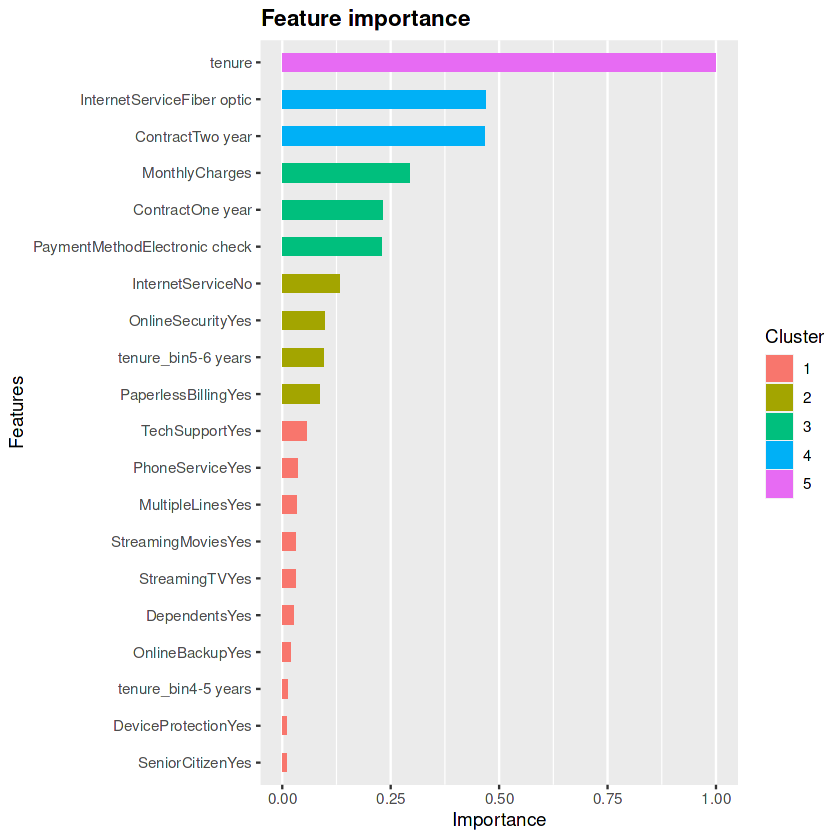

In [ ]:
install.packages("Ckmeans.1d.dp")
library(Ckmeans.1d.dp) #required for ggplot clustering
mat <- xgb.importance (feature_names = colnames(training[,-24]),model = fit_xgb)
xgb.ggplot.importance(importance_matrix = mat[1:20], rel_to_first = TRUE)

#### 8.3 Logistic Regression<a id="8.3"></a>

In [ ]:
training$Churn <- as.factor(ifelse(training$Churn==0, "No", "Yes"))
#建立將全部變數放入的模型
full_logistic = glm(Churn~., family = "binomial", data = training)
summary(full_logistic)


Call:
glm(formula = Churn ~ ., family = "binomial", data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0963  -0.6728  -0.2878   0.5949   3.1673  

Coefficients: (1 not defined because of singularities)
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                             4.113801   2.585589   1.591 0.111598
tenure                                 -0.831337   0.091876  -9.048  < 2e-16
MonthlyCharges                         -0.855780   0.749941  -1.141 0.253816
genderFemale                           -0.018790   0.078030  -0.241 0.809712
genderMale                                    NA         NA      NA       NA
SeniorCitizenYes                        0.020492   0.101522   0.202 0.840033
PartnerYes                              0.068860   0.093545   0.736 0.461661
DependentsYes                          -0.226644   0.107663  -2.105 0.035280
PhoneServiceYes                        -0.217420   0.358212  -0.607

In [ ]:
#使用Backward Stepwise簡化模型
backward_logistic <- step(full_logistic, scope = list(upper = full_logistic), direction = "backward")
summary(backward_logistic)

Start:  AIC=4111.65
Churn ~ tenure + MonthlyCharges + genderFemale + genderMale + 
    SeniorCitizenYes + PartnerYes + DependentsYes + PhoneServiceYes + 
    MultipleLinesYes + `InternetServiceFiber optic` + InternetServiceNo + 
    OnlineSecurityYes + OnlineBackupYes + DeviceProtectionYes + 
    TechSupportYes + StreamingTVYes + StreamingMoviesYes + `ContractOne year` + 
    `ContractTwo year` + PaperlessBillingYes + `PaymentMethodCredit card (automatic)` + 
    `PaymentMethodElectronic check` + `PaymentMethodMailed check` + 
    `tenure_bin1-2 years` + `tenure_bin2-3 years` + `tenure_bin3-4 years` + 
    `tenure_bin4-5 years` + `tenure_bin5-6 years`


Step:  AIC=4111.65
Churn ~ tenure + MonthlyCharges + genderFemale + SeniorCitizenYes + 
    PartnerYes + DependentsYes + PhoneServiceYes + MultipleLinesYes + 
    `InternetServiceFiber optic` + InternetServiceNo + OnlineSecurityYes + 
    OnlineBackupYes + DeviceProtectionYes + TechSupportYes + 
    StreamingTVYes + StreamingMoviesYes +


Call:
glm(formula = Churn ~ tenure + MonthlyCharges + DependentsYes + 
    MultipleLinesYes + `InternetServiceFiber optic` + InternetServiceNo + 
    OnlineSecurityYes + StreamingTVYes + StreamingMoviesYes + 
    `ContractOne year` + `ContractTwo year` + PaperlessBillingYes + 
    `PaymentMethodElectronic check` + `PaymentMethodMailed check` + 
    `tenure_bin3-4 years`, family = "binomial", data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0858  -0.6810  -0.2879   0.6222   3.1818  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      5.35103    1.14416   4.677 2.91e-06 ***
tenure                          -0.71286    0.04789 -14.886  < 2e-16 ***
MonthlyCharges                  -1.28165    0.30047  -4.266 1.99e-05 ***
DependentsYes                   -0.20180    0.09672  -2.086 0.036943 *  
MultipleLinesYes                 0.51631    0.10009   5.158 2.49e-07 ***
`InternetServiceFibe

In [ ]:
prediction_logistic_backward <- predict(backward_logistic, testing[,-24], type = "response")
prediction_logistic_backward <- as.factor(ifelse(prediction_logistic_backward > 0.5, "Yes", "No"))
confusionMatrix(prediction_logistic_backward, testing$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1426  260
       Yes  123  300
                                          
               Accuracy : 0.8184          
                 95% CI : (0.8013, 0.8346)
    No Information Rate : 0.7345          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.495           
                                          
 Mcnemar's Test P-Value : 3.672e-12       
                                          
            Sensitivity : 0.9206          
            Specificity : 0.5357          
         Pos Pred Value : 0.8458          
         Neg Pred Value : 0.7092          
             Prevalence : 0.7345          
         Detection Rate : 0.6761          
   Detection Prevalence : 0.7994          
      Balanced Accuracy : 0.7282          
                                          
       'Positive' Class : No              
                        

Accuracy : 0.8184

In [ ]:
#用放入全部變數的模型預測看看
prediction_logistic_full <- predict(full_logistic, testing[,-24], type = "response")
prediction_logistic_full <- as.factor(ifelse(prediction_logistic_full > 0.5, "Yes", "No"))
confusionMatrix(prediction_logistic_full, testing$Churn)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1429  261
       Yes  120  299
                                          
               Accuracy : 0.8193          
                 95% CI : (0.8022, 0.8355)
    No Information Rate : 0.7345          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4964          
                                          
 Mcnemar's Test P-Value : 7.368e-13       
                                          
            Sensitivity : 0.9225          
            Specificity : 0.5339          
         Pos Pred Value : 0.8456          
         Neg Pred Value : 0.7136          
             Prevalence : 0.7345          
         Detection Rate : 0.6776          
   Detection Prevalence : 0.8013          
      Balanced Accuracy : 0.7282          
                                          
       'Positive' Class : No              
                        

Accuracy : 0.8193

The logistic model after using backward stepwise method and the original logistic model have almost the same accuracy. However, simple is better. 

#### 8.4 SVM<a id="8.4"></a>

In [ ]:
#The tuneLength parameter tells the algorithm to try different default values for the main parameter
# ex : tuneLength = 7，In this case we used 7 default values

svm2 <- train(Churn ~., data = training, method = "svmLinear", trControl = ctrl,  preProcess = c("center","scale"), tuneGrid = expand.grid(C = seq(0, 2, length = 20)))
svm3 <- train(Churn ~., data = training, method = "svmRadial", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 10)
svm4 <- train(Churn ~., data = training, method = "svmPoly", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 4)

#save(svm2, file = "model_params.Rdata.svmLinear")
#save(svm3, file = "model_params.Rdata.svmRadial")
#save(svm4, file = "model_params.Rdata.svmPoly")

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”
Warning message:
“model fit failed for Fold1: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
”
Warning message:
“model fit failed for Fold2: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
”
Warning message:
“model fit failed for Fold3: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
”
Warning message:
“model fit failed for Fold4: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
”
Warning message:
“model fit failed for Fold5: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing v

line search fails -0.7024601 0.542212 1.307423e-05 -5.434266e-06 -1.038293e-08 3.719881e-09 -1.559636e-13

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”
Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


line search fails -0.1264373 0.7043826 3.644217e-05 -3.019586e-06 -1.588369e-09 1.910903e-09 -6.365375e-14

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


line search fails -0.1147375 0.7279162 3.464261e-05 -2.690928e-06 -1.313364e-09 1.857457e-09 -5.049665e-14

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


line search fails -0.09460776 0.7396383 2.548646e-05 -1.707022e-06 -6.630167e-10 1.271895e-09 -1.90691e-14

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


line search fails -0.3223409 0.649528 1.24051e-05 -2.700604e-06 -3.187775e-09 1.518168e-09 -4.364462e-14

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


line search fails -0.1202801 0.7217391 3.494857e-05 -2.810445e-06 -1.424935e-09 1.895148e-09 -5.512566e-14

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


line search fails -0.08803008 0.6902276 8.743915e-05 -4.890587e-06 -1.883599e-09 2.611608e-09 -1.774726e-13

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


line search fails -0.1126674 0.72904 9.828302e-05 -7.183088e-06 -3.513684e-09 5.168777e-09 -3.824633e-13

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


line search fails -0.1290047 0.7038005 6.196582e-05 -5.150208e-06 -2.73409e-09 3.482853e-09 -1.873575e-13

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


line search fails -1.408781 0.1782308 1.405476e-05 -9.225416e-06 -2.366782e-08 4.865401e-09 -3.775308e-13

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


line search fails -0.1197629 0.6837712 6.544312e-05 -4.884591e-06 -2.394379e-09 2.941616e-09 -1.710642e-13

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


line search fails -0.07947184 0.7291192 5.103845e-05 -2.603542e-06 -9.661469e-10 1.525955e-09 -5.328353e-14

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [ ]:
#load(file = "model_params.Rdata.svmLinear")
#load(file = "model_params.Rdata.svmRadial")
#load(file = "model_params.Rdata.svmPoly")

In [ ]:
#svmLinear
prediction_svm2 <- predict(svm2, testing[,-24])
confusionMatrix(prediction_svm2, testing$Churn)
#svmRadial
prediction_svm3 <- predict(svm3, testing[,-24])
confusionMatrix(prediction_svm3, testing$Churn)
#svmPoly
prediction_svm4 <- predict(svm4, testing[,-24])
confusionMatrix(prediction_svm4, testing$Churn)


Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1445  294
       Yes  104  266
                                          
               Accuracy : 0.8113          
                 95% CI : (0.7939, 0.8278)
    No Information Rate : 0.7345          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4574          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9329          
            Specificity : 0.4750          
         Pos Pred Value : 0.8309          
         Neg Pred Value : 0.7189          
             Prevalence : 0.7345          
         Detection Rate : 0.6852          
   Detection Prevalence : 0.8246          
      Balanced Accuracy : 0.7039          
                                          
       'Positive' Class : No              
                        

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1460  310
       Yes   89  250
                                          
               Accuracy : 0.8108          
                 95% CI : (0.7934, 0.8273)
    No Information Rate : 0.7345          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.445           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9425          
            Specificity : 0.4464          
         Pos Pred Value : 0.8249          
         Neg Pred Value : 0.7375          
             Prevalence : 0.7345          
         Detection Rate : 0.6923          
   Detection Prevalence : 0.8393          
      Balanced Accuracy : 0.6945          
                                          
       'Positive' Class : No              
                        

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1436  282
       Yes  113  278
                                          
               Accuracy : 0.8127          
                 95% CI : (0.7954, 0.8292)
    No Information Rate : 0.7345          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4686          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9270          
            Specificity : 0.4964          
         Pos Pred Value : 0.8359          
         Neg Pred Value : 0.7110          
             Prevalence : 0.7345          
         Detection Rate : 0.6809          
   Detection Prevalence : 0.8146          
      Balanced Accuracy : 0.7117          
                                          
       'Positive' Class : No              
                        

  * SVM Linear 
  
  Accuracy : 0.8113
  Sensitivity : 0.9329          
  Specificity : 0.4720  
  
  * SVM Radial 
  
  Accuracy : 0.8108
  Sensitivity : 0.9425
  Specificity : 0.4464

  * SVM Poly 
  
  Accuracy : 0.8127
  Sensitivity : 0.9270          
  Specificity : 0.4964  



#### 8.5 Summary of all the models<a id="8.5"></a>

Checking the AUC for all three models:

Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases



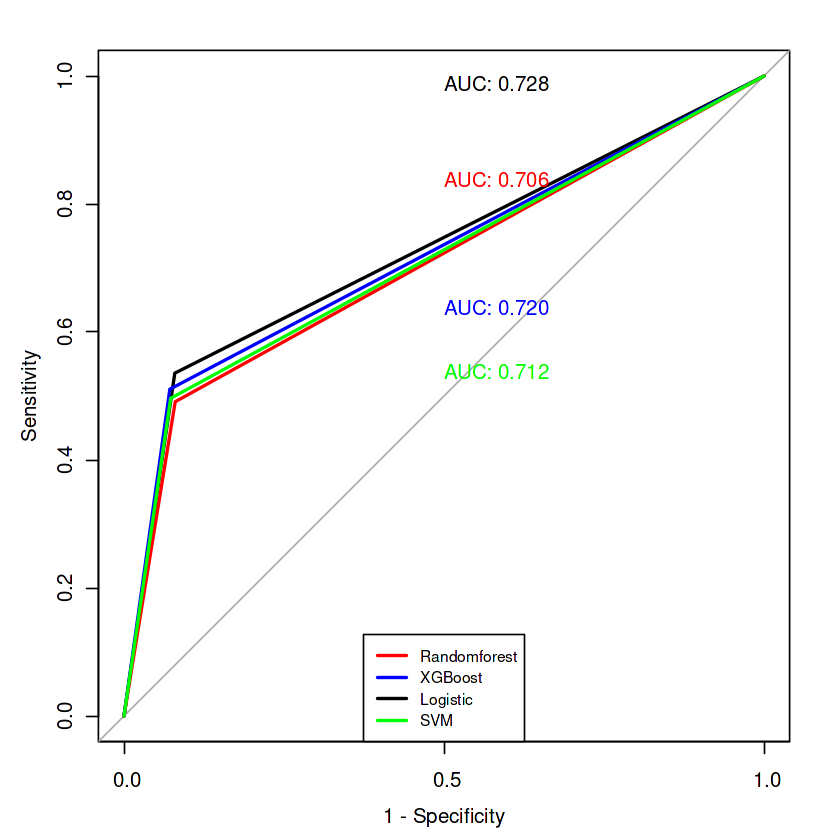

In [ ]:
logistic.roc <- roc(response = testing$Churn, predictor = as.numeric(prediction_logistic_backward))
xgboost.roc <- roc(response = testing$Churn, predictor = as.numeric(prediction_xgb))
randomforest.roc <- roc(response = testing$Churn, predictor = as.numeric(prediction_rf))
svmPoly.roc <- roc(response = testing$Churn, predictor = as.numeric(prediction_svm4))

plot(logistic.roc,legacy.axes = TRUE, print.auc.y = 1.0, print.auc = TRUE)
plot(xgboost.roc, col = "blue", add = TRUE, print.auc.y = 0.65, print.auc = TRUE)
plot(randomforest.roc, col = "red" , add = TRUE, print.auc.y = 0.85, print.auc = TRUE)
plot(svmPoly.roc, col = "green" , add = TRUE, print.auc.y = 0.55, print.auc = TRUE)
legend("bottom", c("Randomforest", "XGBoost", "Logistic", "SVM"),
       lty = c(1,1), lwd = c(2, 2), col = c("red", "blue", "black", "Green"), cex = 0.75)

Accuracy, Sensitivity, Specificity

**RandomForest**

  * Accuracy : 0.8061
  
  * Sensitivity : 0.9199         
   
  * Specificity : 0.4911

**XGBoost**
  
  * Accuracy : 0.8174
  
  * Sensitivity : 0.9283         
   
  * Specificity : 0.5107
  
**Logistic**

  * Accuracy : 0.8184
  
  * Sensitivity : 0.9206          
            
  * Specificity : 0.5357
 
**SVM**
  
  * Accuracy : 0.8127
  
  * Sensitivity : 0.9270          
  
  * Specificity : 0.4964